# Homework 2

## Task 1: 

### Problem:

#### Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).
#### (a) Load each image, and convert it to a tensor.
#### (b) For each image tensor, use the .mean() method to get a sense of how bright the image is.
#### (c) Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?

##### Importing the libraries

In [5]:
import torch, cv2
from IPython.display import Image

##### Loading a sample image

In [7]:
image_1_path = '../link_pytorch/data/p1ch4/image-dog/bobby.jpg'
image_1 = cv2.imread(image_1_path)

##### Converting the image to tensor

In [8]:
image_1_tensor = torch.from_numpy(image_1.transpose((2, 0, 1))).float()

##### Calculating the mean of the tensor to get the brightness of the image

In [9]:
image_1_brightness = image_1_tensor.mean()
image_1_brightness

tensor(123.6176)

##### Calculating the mean for each channel of the image

In [10]:
image_1_mean = image_1_tensor.mean(dim=(1, 2))
image_1_mean

tensor([ 70.1902, 128.6818, 171.9807])

##### Writing a function for the sequence

In [11]:
def get_brightness_channel(path):
    image = cv2.imread(path)
    image_tensor = torch.from_numpy(image.transpose((2, 0, 1))).float()
    brightness = image_tensor.mean()
    channel_mean = image_tensor.mean(dim=(1, 2))
    return brightness, channel_mean

##### Image 1

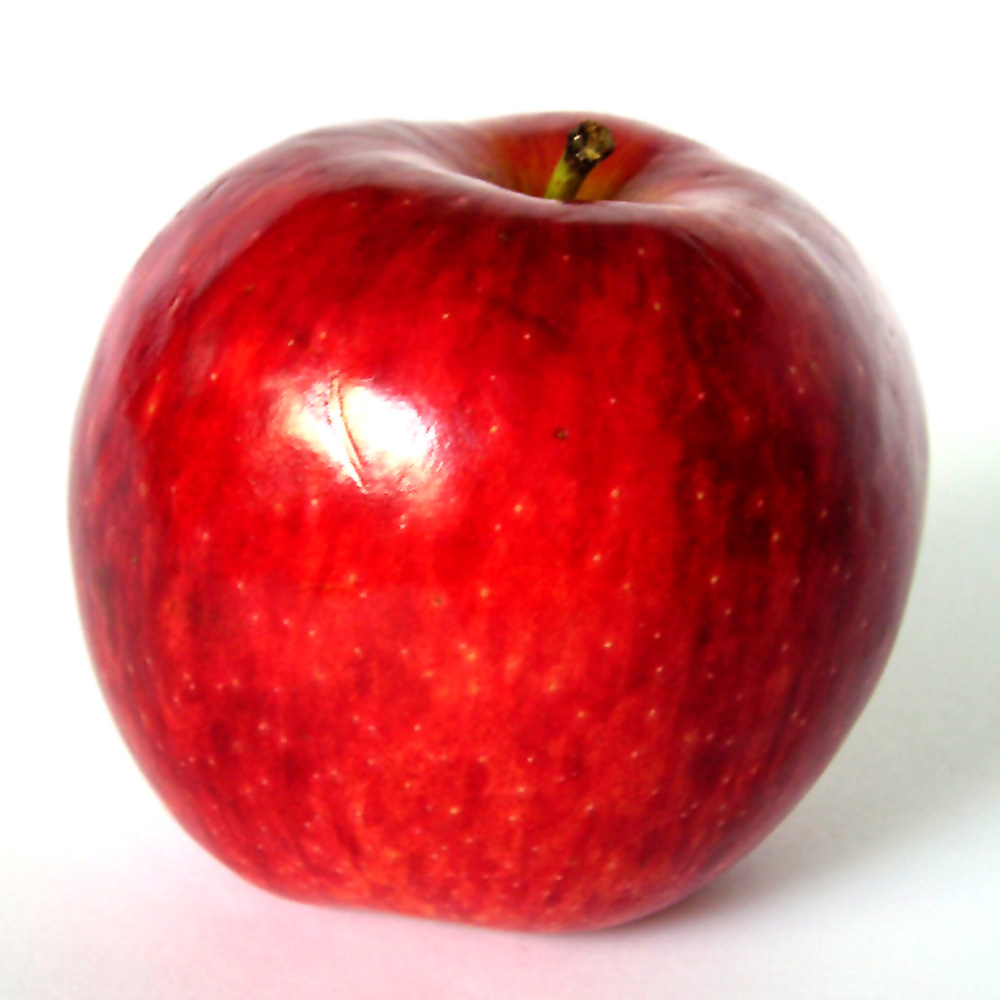

In [28]:
p = 'R.jpeg'
Image(p, width=200, height= 200)

In [31]:
brigntness, channel_mean = get_brightness_channel(p)
print('brightness: ', brigntness, 'channel_mean: ', channel_mean) #We can obeserve that the R channel has the highest value

brightness:  tensor(154.7419) channel_mean:  tensor([126.6631, 124.6653, 212.8975])


##### Image 2

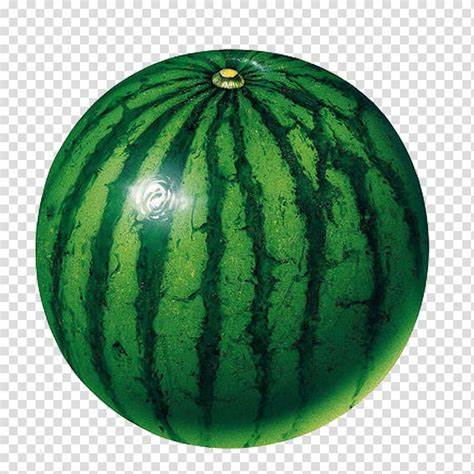

In [22]:
p = 'G.jpeg'
Image(p, width=200, height= 200)

In [23]:
brigntness, channel_mean = get_brightness_channel(p)
print('brightness: ', brigntness, 'channel_mean: ', channel_mean) #We can observe that the G channel has the highest value

brightness:  tensor(138.4926) channel_mean:  tensor([133.0775, 158.6083, 123.7919])


##### Image 3

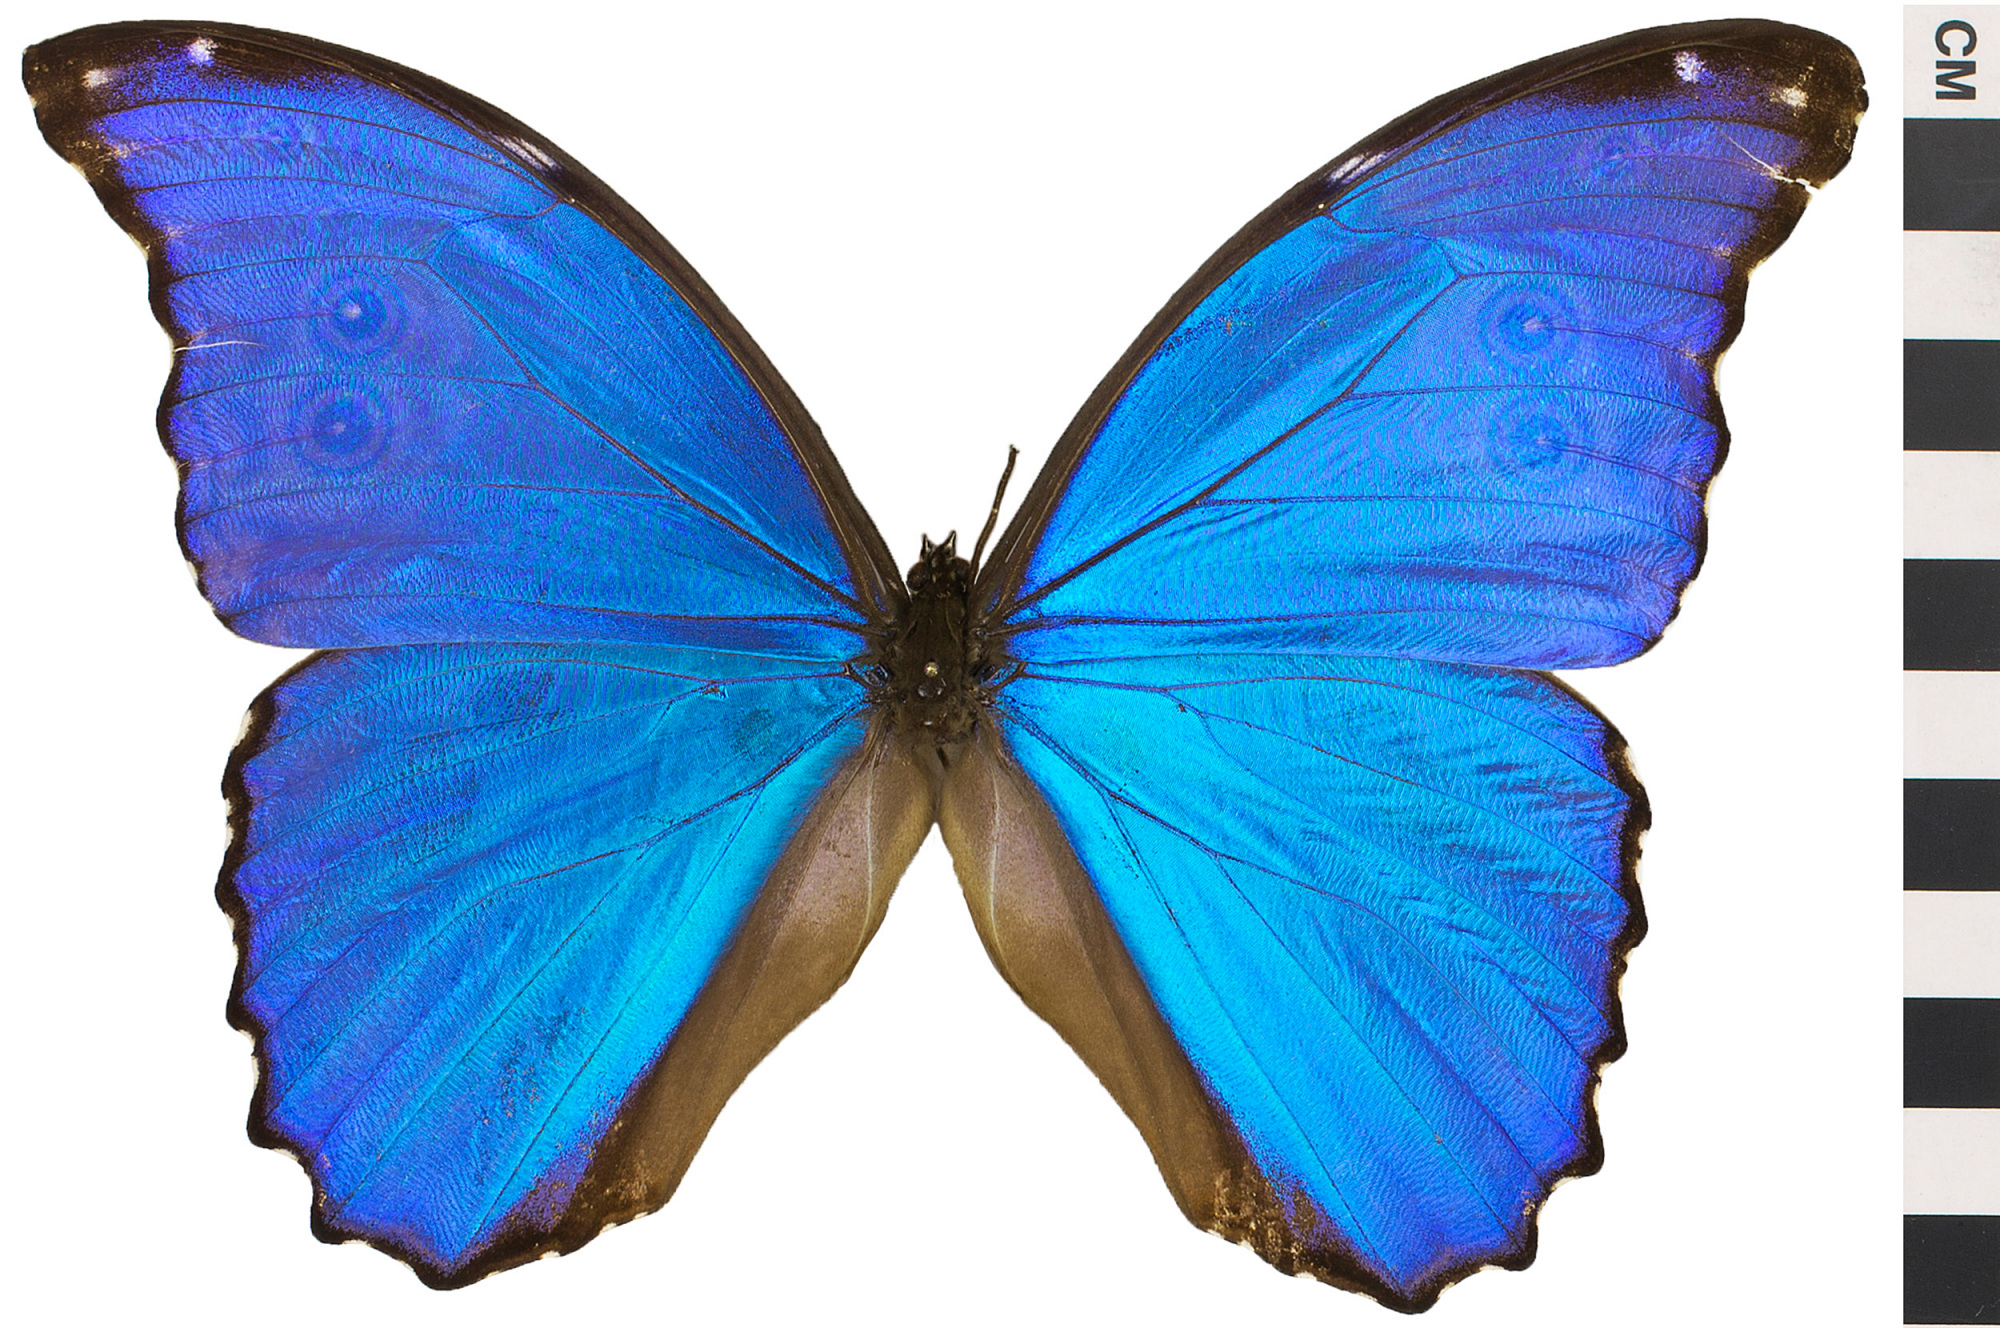

In [24]:
p = 'B.jpeg'
Image(p, width=200, height= 200)

In [26]:
brigntness, channel_mean = get_brightness_channel(p)
print('brightness: ', brigntness, 'channel_mean: ', channel_mean) #We can observe that the B channel has the highest value

brightness:  tensor(172.7274) channel_mean:  tensor([209.8795, 172.4903, 135.8126])


## Task 2: 

### Problem:

#### Redefine the model to be w2 * t_u ** 2 + w1 * t_u + b.
#### (a) What parts of the training loop, and so on, need to change to accommodate this redefinition?
The model and the training loop need to be changed. The model needs to be changed to accomodate the new equation and the training loop needs to be changed to accomodate the new model.
#### (b) What parts are agnostic to swapping out the model?
THe loss function
#### (c) Is the resulting loss higher or lower after training?
The loss is a little higher as compared to the previous model.
#### (d) Is the actual result better or worse?
The result is not better as compared to the earlier ones. 

In [127]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [128]:
#Input data (temperatures in Celsius and Fahrenheit)
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u  # normalization of the input data

In [129]:
#Model function that predicts the temperature in Celsius
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [130]:
#Loss function as the mean squared error between the predicted and actual temperatures
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [131]:
# Initialize the model parameters with three elements to include w2
params = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)

# Check if the gradients of the parameters are None
params.grad is None

True

In [132]:
# Compute the loss and its gradients
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [133]:
# Set the gradients of the parameters to zero to avoid accumulating them across iterations
if params.grad is not None:
    params.grad.zero_()

In [134]:
# Define the training loop that updates the parameters using stochastic gradient descent
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        # Compute the predicted temperatures using the current parameters
        t_p = model(t_u, *params) 
        
        # Compute the loss between the predicted and actual temperatures
        loss = loss_fn(t_p, t_c)
        
        # Compute the gradients of the parameters with respect to the loss
        loss.backward()
        
        # Update the parameters using stochastic gradient descent
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        # Print the loss every 500 epochs
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [135]:
params = training_loop(
    n_epochs = 10000, 
    learning_rate = 1e-4, 
    params = params, 
    t_u = t_un, 
    t_c = t_c
)

Epoch 500, Loss 13.295361
Epoch 1000, Loss 10.560289
Epoch 1500, Loss 8.613449
Epoch 2000, Loss 7.227292
Epoch 2500, Loss 6.239962
Epoch 3000, Loss 5.536327
Epoch 3500, Loss 5.034493
Epoch 4000, Loss 4.676206
Epoch 4500, Loss 4.420029
Epoch 5000, Loss 4.236486
Epoch 5500, Loss 4.104614
Epoch 6000, Loss 4.009500
Epoch 6500, Loss 3.940536
Epoch 7000, Loss 3.890173
Epoch 7500, Loss 3.853050
Epoch 8000, Loss 3.825345
Epoch 8500, Loss 3.804346
Epoch 9000, Loss 3.788116
Epoch 9500, Loss 3.775283
Epoch 10000, Loss 3.764873


In [136]:
print(params)

tensor([-1.4890,  0.6358, -0.2890], requires_grad=True)


## Task 3: 

### Problem:

#### The third-hardest problem in physics is finding a proper wine to celebrate discoveries. Load the wine data from chapter 4, and create a new model with the appropriate number of input parameters.
#### (a) How long does it take to train compared to the temperature data we have been using?
I tried playing with the layers multiple times, the most recent iteration that I am submitting is taking around 5 minutes to train.
#### (b) Can you explain what factors contribute to the training times?
The number of layers and the number of neurons in each layer contribute to the training time.
#### (c) Can you get the loss to decrease while training on this dataset?
Yes, I was able to get the loss to decrease while training on this dataset. I had to change the activation functions, the number of layers and the epochs to get the loss to decrease.
#### (d) How would you go about graphing this dataset?
I am actually printing the graphs for the loss and the accuracy. Other than that I am also printing the graphs for the predictions and the actual values. Another graph shows prediction and actual values for each class


##### Importing the required libraries

In [149]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv("../link_pytorch/data/p1ch4/tabular-wine/winequality-white.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [169]:
# add extra column of ones to represent bias term
X = df.iloc[:, :-1]
X = np.hstack((X, np.ones((X.shape[0], 1))))
# normalize features to have zero mean and unit variance
X = (X - X.mean()) / X.std()
y = df.iloc[:, -1]

# split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

In [170]:
# define neural network model
class WineNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(12, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Dropout(0.2),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        return self.model(x)

Epoch [100/5000], Train Loss: 36.0816, Val Loss: 35.2756
Epoch [200/5000], Train Loss: 35.5204, Val Loss: 34.7842
Epoch [300/5000], Train Loss: 34.8711, Val Loss: 34.1804
Epoch [400/5000], Train Loss: 34.0816, Val Loss: 33.4240
Epoch [500/5000], Train Loss: 33.0724, Val Loss: 32.2184
Epoch [600/5000], Train Loss: 31.9379, Val Loss: 30.9973
Epoch [700/5000], Train Loss: 30.6522, Val Loss: 29.7938
Epoch [800/5000], Train Loss: 29.1867, Val Loss: 28.3945
Epoch [900/5000], Train Loss: 27.8042, Val Loss: 26.9797
Epoch [1000/5000], Train Loss: 26.4042, Val Loss: 25.4342
Epoch [1100/5000], Train Loss: 24.8720, Val Loss: 24.0650
Epoch [1200/5000], Train Loss: 23.1359, Val Loss: 22.4247
Epoch [1300/5000], Train Loss: 21.7905, Val Loss: 20.6268
Epoch [1400/5000], Train Loss: 19.7779, Val Loss: 19.1044
Epoch [1500/5000], Train Loss: 18.3545, Val Loss: 17.5673
Epoch [1600/5000], Train Loss: 17.0026, Val Loss: 16.1135
Epoch [1700/5000], Train Loss: 15.1871, Val Loss: 14.3979
Epoch [1800/5000], Trai

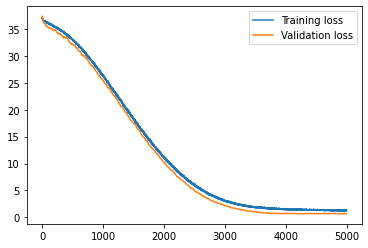

In [163]:
model = WineNet()

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)

# train model
def train(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []
    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)

        train_losses.append(loss.item())
        val_losses.append(val_loss.item())

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

    plt.plot(train_losses, label='Training loss')
    plt.plot(val_losses, label='Validation loss')
    plt.legend()
    plt.show()

num_epochs = 5000
train(model, X_train, y_train, X_val, y_val, criterion, optimizer, num_epochs)


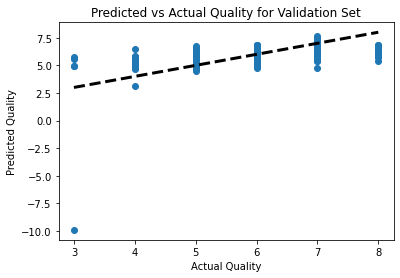

In [164]:
# get predicted values for validation set
model.eval()
with torch.no_grad():
    y_val_pred = model(X_val)

# create scatter plot
fig, ax = plt.subplots()
ax.scatter(y_val, y_val_pred)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)
ax.set_xlabel('Actual Quality')
ax.set_ylabel('Predicted Quality')
ax.set_title('Predicted vs Actual Quality for Validation Set')
plt.show()

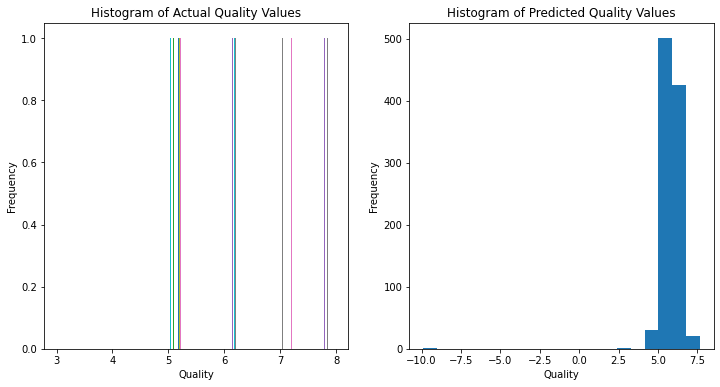

In [166]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# histogram of actual values
ax[0].hist(y_val, bins=20)
ax[0].set_xlabel('Quality')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Actual Quality Values')

# histogram of predicted values
ax[1].hist(y_val_pred.numpy(), bins=20)
ax[1].set_xlabel('Quality')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Predicted Quality Values')

plt.show()

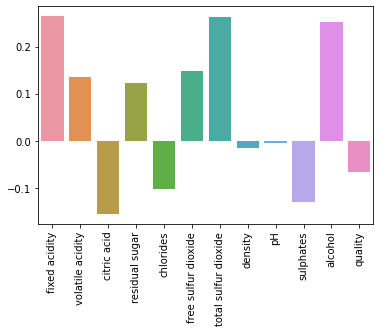

In [168]:
# get weights assigned to input features in the neural network model
weights = model.model[0].weight.detach().numpy()[0]

# create bar plot of input feature weights
sns.barplot(x=df.columns, y=weights)
plt.xticks(rotation=90)
plt.show()